In [78]:
#! pip install geopandas
#! pip install contextily
import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

In [79]:
from google.colab import files
uploaded = files.upload()

Saving boston_block_groups.geojson to boston_block_groups (2).geojson


In [105]:
gdf = gpd.read_file('boston_block_groups.geojson')

In [106]:
gdf = gdf.drop([0])

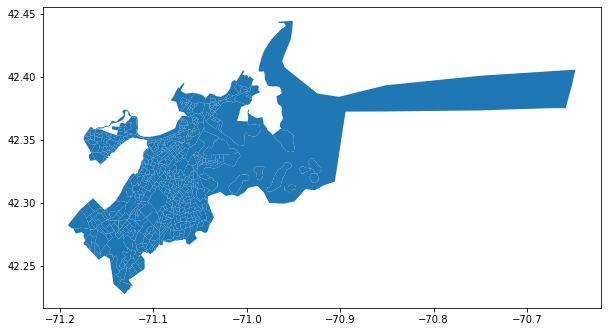

In [107]:
gdf.plot(figsize=(10,10))


In [108]:
columns_to_keep = ['geoid', 'name', 'B28002001', 'B28002004', 'B28002013', 'geometry']

gdf = gdf[columns_to_keep]

gdf.columns = ['geoid', 'name', 'Total','Broadband of Any Type','No Internet','geometry']

gdf['Percent No Internet'] = gdf['No Internet']/gdf['Total']*100

gdf['Percent Broadband'] = gdf['Broadband of Any Type']/gdf['Total']*100

gdf['Percent No Broadband'] = 100 - gdf['Percent Broadband']

gdf_web_mercator = gdf.to_crs(epsg=3857)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


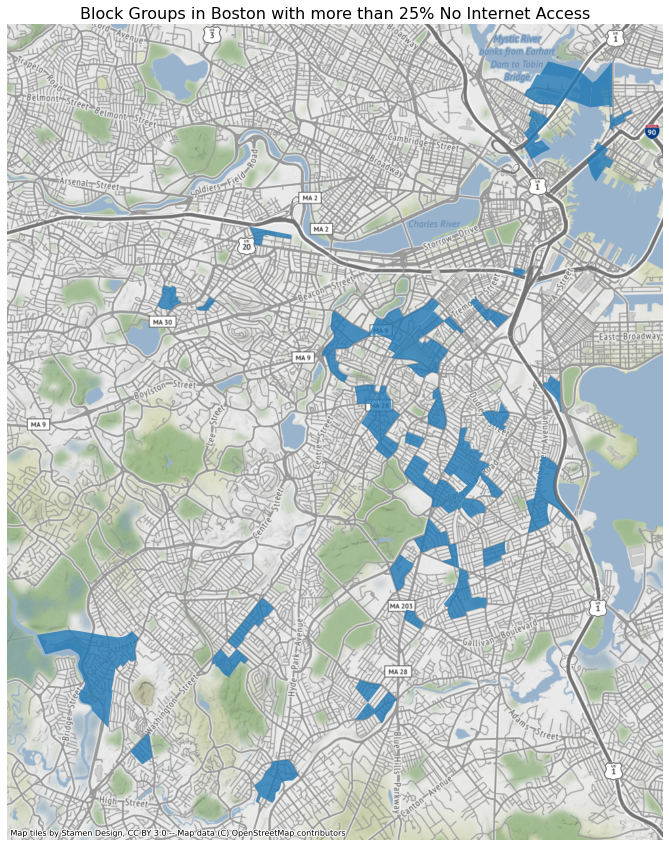

In [109]:
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent No Internet'] > 25].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Block Groups in Boston with more than 25% No Internet Access',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


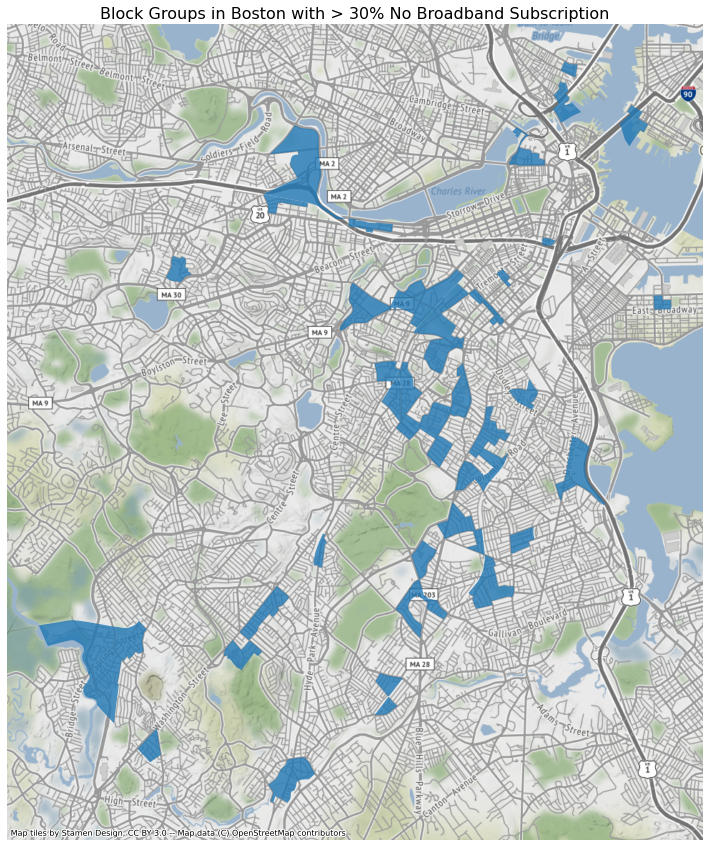

In [115]:
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent No Broadband'] > 30].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Block Groups in Boston with > 30% No Broadband Subscription',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

In [77]:
gdf.head()

,geoid,name,Total,Broadband of Any Type,No Internet,geometry,Percent No Internet,Percent Broadband,Percent No Broadband
1,15000US250250001002,"Block Group 2, Suffolk, MA",409.0,342.0,20.0,"MULTIPOLYGON (((-71.13605 42.36143, -71.13582 ...",4.889976,83.618582,16.381418
2,15000US250250001003,"Block Group 3, Suffolk, MA",251.0,239.0,0.0,"MULTIPOLYGON (((-71.13660 42.36016, -71.13633 ...",0.000000,95.219124,4.780876
3,15000US250250001004,"Block Group 4, Suffolk, MA",455.0,455.0,0.0,"MULTIPOLYGON (((-71.14445 42.35871, -71.14439 ...",0.000000,100.000000,0.000000
4,15000US250250002011,"Block Group 1, Suffolk, MA",473.0,435.0,31.0,"MULTIPOLYGON (((-71.16244 42.35597, -71.16233 ...",6.553911,91.966173,8.033827
5,15000US250250002012,"Block Group 2, Suffolk, MA",236.0,227.0,9.0,"MULTIPOLYGON (((-71.16311 42.35296, -71.16300 ...",3.813559,96.186441,3.813559
